In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('insurance_data.csv',sep='\t')
data

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


checking null values/missing values

In [3]:
data.isnull().sum()

age                 0
bought_insurance    0
dtype: int64

analysing..

In [4]:
x=data[['age']]
y=data.drop('age',axis=1)


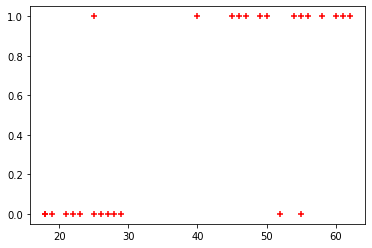

In [5]:
plt.scatter(x,y,color='r',marker='+')


Above plt shows its a logistic curve ...
above 40 ages will be want insurance 

<AxesSubplot:xlabel='age', ylabel='bought_insurance'>

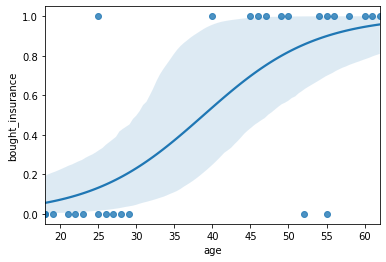

In [6]:
import seaborn as sns

sns.regplot(x='age',y='bought_insurance',data=data,logistic=True)

Splitting into train and test data

In [23]:
#splitting
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
y_train.shape
#x_test

(21, 1)

In [24]:
#y_test ## actual values

Fitting and predicting

In [25]:
##fitting and predict
lr=LogisticRegression()
lr.fit(x_train,y_train)

y_pred=lr.predict(x_test)
y_pred

array([1, 0, 1, 0, 0, 0])

In [26]:
prob_ypred=lr.predict_proba(x_test)
prob_ypred     ## check the predicted probability of 0 and 1 

array([[0.05428681, 0.94571319],
       [0.70555426, 0.29444574],
       [0.06039343, 0.93960657],
       [0.77085061, 0.22914939],
       [0.84096546, 0.15903454],
       [0.72848825, 0.27151175]])

In [27]:
lr.predict([[20]])

array([0])

In [28]:
prob_xtrn=lr.predict_proba(x_train)
prob_xtrn

array([[0.79021099, 0.20978901],
       [0.08276569, 0.91723431],
       [0.75026822, 0.24973178],
       [0.18231638, 0.81768362],
       [0.79021099, 0.20978901],
       [0.259528  , 0.740472  ],
       [0.1016344 , 0.8983656 ],
       [0.23839476, 0.76160524],
       [0.11243387, 0.88756613],
       [0.40855066, 0.59144934],
       [0.15098629, 0.84901371],
       [0.12422218, 0.87577782],
       [0.28184138, 0.71815862],
       [0.88128556, 0.11871444],
       [0.82525318, 0.17474682],
       [0.85551234, 0.14448766],
       [0.06713821, 0.93286179],
       [0.8926153 , 0.1073847 ],
       [0.19978243, 0.80021757],
       [0.8926153 , 0.1073847 ],
       [0.11243387, 0.88756613]])

In [29]:
from sklearn.metrics import log_loss
#find log_loss

In [30]:

print()
print('Actual values are:',y_test)
print()
print('predicted values are:',y_pred)
print()
print('probability of predicted values are:',prob_ypred )
print()
print()



print('Coefficeint value:',lr.coef_ ) ## coefficient 
print()
print('Intercept value:',lr.intercept_ ) ## intercept
print()
print('Score value:',lr.score(x_train,y_train)) 
print()
print('log_loss values:',log_loss(y_test,y_pred))
print()


Actual values are:     bought_insurance
8                  1
13                 0
9                  1
21                 0
0                  0
11                 0

predicted values are: [1 0 1 0 0 0]

probability of predicted values are: [[0.05428681 0.94571319]
 [0.70555426 0.29444574]
 [0.06039343 0.93960657]
 [0.77085061 0.22914939]
 [0.84096546 0.15903454]
 [0.72848825 0.27151175]]


Coefficeint value: [[0.11307718]]

Intercept value: [-4.15312723]

Score value: 0.8571428571428571

log_loss values: 9.992007221626415e-16




Confusion matrix
[[4 0]
 [0 2]]

classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         2

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6





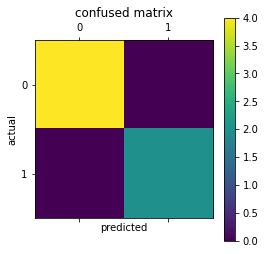

In [31]:
##confusion matrix

from sklearn.metrics import confusion_matrix,classification_report


matrix=confusion_matrix(y_test,y_pred)
print()
print("Confusion matrix")
print(matrix)
print()
report=classification_report(y_test,y_pred)
print('classification report:\n',report)

print()
print()

plt.matshow(matrix)  ## matshow is to plot data as matrix
plt.title('confused matrix')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.colorbar()
plt.show()

tp,fn,fp,tn 

precision and recall is 100% ,
no false positive and false negative
this is an ideal matrix 

Manually check 

In [33]:
import math
def sigmoid(x):
    return 1/(1+math.exp(-x))


In [34]:
def predict_age(age):
    z=lr.coef_*age-lr.intercept_
    y=sigmoid(z)
    return y

In [35]:
age=20
predict_age(age)

0.998365317886323